# Load image and get underlying numpy object

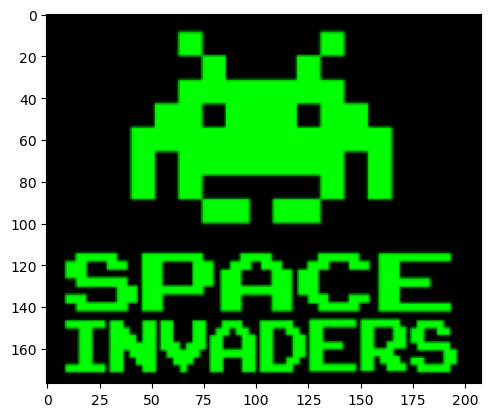

In [51]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

loc_input_img = PIL.Image.open(os.path.join(os.getcwd(), 'data', 'input', 'image_raw.png')) # in case of error, replace line by: loc_input_img = os.path.join('..', 'data', 'input', 'image_raw.png')
img = np.array(loc_input_img)
plt.imshow(img)
plt.show()

# Manipulation 1: create image multiplication

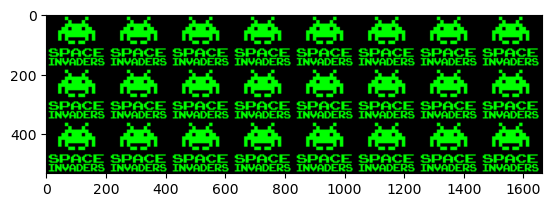

In [52]:
img_tile = np.tile(img, (3, 8, 1))
plt.imshow(img_tile)

Image.fromarray(img_tile).save('data/input/image_manipulation1.png')

# Manipulation 2: perform flips

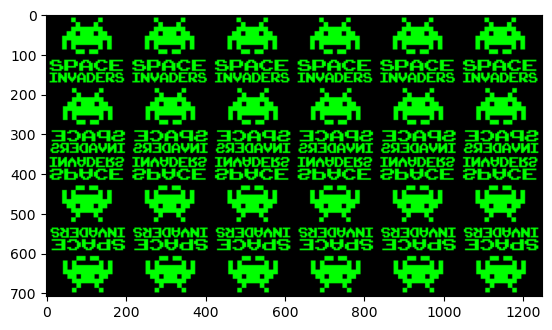

In [72]:
# flip original image in three ways
img_mirror = np.fliplr(img)
img_upside = np.flipud(img)
img_mirrorup = np.flipud(img_mirror)

# stack 4 images and concatenate vertically
img_flip = np.concatenate([img, img_mirror, img_upside, img_mirrorup], axis=0)
img_flip = np.tile(img_flip, (1, 6, 1))
plt.imshow(img_flip)

Image.fromarray(img_flip).save('data/input/image_manipulation2.png')

In [ ]:
# Manipulation 3: colourful images